#### Gerekli Kütüphaneler 

In [1]:
import numpy as np
import pandas as pd

#### Veri Yükleme 

Veriseti kaynak: https://www.kaggle.com/suleymancan/turkishnews70000

In [2]:
dataset = pd.read_csv("./turkish_news_70000.csv", index_col="id")
dataset.head()

,main_image,published,site,text,title,url
id,,,,,,
72337,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:33:00.000+02:00""","""diken.com.tr""","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...","""http://www.diken.com.tr/yatirim-bankasi-dolar..."
72338,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T13:21:00.000+02:00""","""diken.com.tr""","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""PİAR Araştırma: Adana ve Antalya’da ‘millet i...","""http://www.diken.com.tr/piar-arastirma-adana-..."
72339,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T12:20:00.000+02:00""","""diken.com.tr""","""Renaissance Capital: Merkez Bankası bu hafta ...","""Renaissance Capital: Merkez Bankası bu hafta ...","""http://www.diken.com.tr/renaissance-capital-m..."
72340,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:53:00.000+02:00""","""diken.com.tr""","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...","""http://www.diken.com.tr/agridaki-iyi-partilil..."
72341,"""http://www.diken.com.tr/wp-content/uploads/20...","""2019-03-04T11:52:00.000+02:00""","""diken.com.tr""","""Otomobil pazarı iki ayda yarı yarıya eridi 04...","""Otomobil pazarı iki ayda yarı yarıya eridi""","""http://www.diken.com.tr/otomobil-pazari-iki-a..."


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72109 entries, 72337 to 72336
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   main_image  72109 non-null  object
 1   published   72109 non-null  object
 2   site        72109 non-null  object
 3   text        72109 non-null  object
 4   title       72109 non-null  object
 5   url         72109 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


In [7]:
# Veriseti farklı kaynaklardan elde edilen, 70000 haber içeriğinden oluşmaktadır.
# Örnek uygulama gösterdiğimizden dolayı, ilk 10000 haber içeriğini kullanacağız.
dataset = dataset.head(10000)

#### Veri Hazırlama & Temizleme

In [8]:
# LDA modelinde sadece "text" sütununu kullanmamız yeterli olacaktır.
news_df = dataset[["text"]]
news_df.head(3)

,text
id,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ..."


#### Başlıca Veri Temizleme İşlemleri
#### 1) Verisetindeki tüm harfleri küçük duruma getirmek
#### 2) Noktalama işaretlerini kaldırmak
#### 3) Etkisiz kelimeleri  (stopwords) kaldırmak. Örnek: ve, için, ama, çok, vb.

In [9]:
import re
import string
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# stopwords
stop_words_tr = stopwords.words('turkish') 
stop_words_tr.extend(["bir", "kadar", "sonra"])

# for data cleaning
def clean_data(text: str) -> str:
    text = text.replace("\\n"," ")
    text = re.sub("’(\w+)", "", text) 
    text = re.sub("'(\w+)", "", text) 
    text = re.sub("[\W || \d]", " ", text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words_tr]
    text = " ".join(text)
    
    return text

In [11]:
news_df["cleaned_text"] = news_df["text"].apply(clean_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Possible set union at position 4
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Ham Metin - Temizlenmiş Metin Örneği

In [12]:
news_df.iloc[3].text

'"Ağrı’daki İYİ Partililerin istifa gerekçesi: AKP’li Savcı Sayan’ın iş bilen kişiliği! 04/03/2019 12:53\\nİYİ Parti Ağrı Gençlik Kolları üyeleri istifa edip AKP adayı Savcı Sayan’a destek vereceklerini ilan etti. Fotoğraf: Arşiv\\nEski CHP genel başkanı Deniz Baykal’ın yönetim ekibinde yer alan Savcı Sayan, Kemal Kılıçdardoğlu’nun liderliğe gelmesiyle partiden uzaklaşarak AKP’ye geçmişti. 2015’teki genel seçimlerde İzmir’de AKP’den ikinci bölge yedinci sıradan aday gösterilen Sayan meclise girmeyi başaramamıştı. Sayan, 24 Haziran 2018’deki genel seçimler için AKP’den adaylık başvurusu yapmış ancak parti yönetimi tarafından kabul edilmemişti. Reklam\\nSayan son olarak 31 Mart’taki yerel seçimlerde AKP’nin Ağrı belediye başkan adayı.\\nİYİ Parti Ağrı Gençlik Kolları Başkanı Emrah Aslan, beraberindeki üyelerle Abide Meydanı’nda yaptığı basın açıklamasında parti genel merkezinin sürdürdüğü yanlış politikalar gerekçesiyle topluca istifa kararı alındığını belirtti.\\nBir yıl önce İYİ Parti’

In [13]:
news_df.iloc[3].cleaned_text

'ağrı i̇yi̇ partililerin istifa gerekçesi akp savcı sayan iş bilen kişiliği i̇yi̇ parti ağrı gençlik kolları üyeleri istifa edip akp adayı savcı sayan destek vereceklerini ilan etti fotoğraf arşiv eski chp genel başkanı deniz baykal yönetim ekibinde yer alan savcı sayan kemal kılıçdardoğlu liderliğe gelmesiyle partiden uzaklaşarak akp geçmişti genel seçimlerde i̇zmir akp ikinci bölge yedinci sıradan aday gösterilen sayan meclise girmeyi başaramamıştı sayan haziran genel seçimler akp adaylık başvurusu yapmış ancak parti yönetimi tarafından kabul edilmemişti reklam sayan son olarak mart yerel seçimlerde akp ağrı belediye başkan adayı i̇yi̇ parti ağrı gençlik kolları başkanı emrah aslan beraberindeki üyelerle abide meydanı yaptığı basın açıklamasında parti genel merkezinin sürdürdüğü yanlış politikalar gerekçesiyle topluca istifa kararı alındığını belirtti yıl önce i̇yi̇ parti katıldıklarını belirten aslan şöyle konuştu istifanın sorumlusu ana kademe il başkanı belediye başkan adayımızdır

#### Metin Tokenize Etme İşlemi 

In [14]:
news_df["tokenized_text"] = news_df["cleaned_text"].apply(lambda x: x.split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
# Temizlenmiş ve tokenize edilmiş metinleri de haber_veriseti dataframe'ine ekledik
# İlk on satır örnek
news_df.head(10)

,text,cleaned_text,tokenized_text
id,,,
72337,"""Yatırım bankası: Dolar/TL üçüncü çeyrekte 8.9...",yatırım bankası dolar tl üçüncü çeyrekte görec...,"[yatırım, bankası, dolar, tl, üçüncü, çeyrekte..."
72338,"""PİAR Araştırma: Adana ve Antalya’da ‘millet i...",pi̇ar araştırma adana antalya millet ittifakı ...,"[pi̇ar, araştırma, adana, antalya, millet, itt..."
72339,"""Renaissance Capital: Merkez Bankası bu hafta ...",renaissance capital merkez bankası hafta baz p...,"[renaissance, capital, merkez, bankası, hafta,..."
72340,"""Ağrı’daki İYİ Partililerin istifa gerekçesi: ...",ağrı i̇yi̇ partililerin istifa gerekçesi akp s...,"[ağrı, i̇yi̇, partililerin, istifa, gerekçesi,..."
72341,"""Otomobil pazarı iki ayda yarı yarıya eridi 04...",otomobil pazarı iki ayda yarı yarıya eridi oto...,"[otomobil, pazarı, iki, ayda, yarı, yarıya, er..."
72342,"""Şubat ayında ihracat yüzde 3.7 arttı, ithalat...",şubat ayında ihracat yüzde arttı ithalat yüzde...,"[şubat, ayında, ihracat, yüzde, arttı, ithalat..."
72343,"""YSK Başkanı Güven'den 'seçim güvenliği' açıkl...",ysk başkanı güven güvenliği açıklaması şubat c...,"[ysk, başkanı, güven, güvenliği, açıklaması, ş..."
72344,"""Hapisten çıkmasın diye kızları intihara kalkı...",hapisten çıkmasın kızları intihara kalkışmıştı...,"[hapisten, çıkmasın, kızları, intihara, kalkış..."
72345,"""Yavaş’tan Özhaseki’ye: Tecrübeyse, Gökçek dah...",yavaş özhaseki tecrübeyse gökçek tecrübeliydi ...,"[yavaş, özhaseki, tecrübeyse, gökçek, tecrübel..."


####  LDA Model Eğitimi

Kaynak: https://radimrehurek.com/gensim/models/ldamodel.html

In [16]:
!pip install -q pyLDAvis

In [17]:
import gensim
import gensim.corpora as corpora

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis # for virtualization of LDA model

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [18]:
# Kelime Listesi - Dictionary Oluşturulması
tokenized_news = news_df["tokenized_text"]
dictionary = corpora.Dictionary(tokenized_news)

#Kelime Listesi Filtreleme
dictionary.filter_extremes(no_below=3, no_above=0.7)

In [19]:
# Terimlerin Vektörleştirilmesi -- Doküman-Terim Matrisinin Oluşturulması
corpus = [dictionary.doc2bow(doc) for doc in tokenized_news]

In [ ]:
# LDA Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=15,
                                            passes=10)

#### Sonuçlar 

In [21]:
# Oluşturulan soyut konular içerisinde en fazla bulunan terimler
topics = lda_model.print_topics(num_words=7) 

for topic in topics:
    print(topic)

(0, '0.018*"erdoğan" + 0.012*"türkiye" + 0.008*"cumhurbaşkanı" + 0.006*"terör" + 0.005*"var" + 0.005*"bizim" + 0.005*"soylu"')
(1, '0.020*"abd" + 0.006*"trump" + 0.006*"başkanı" + 0.005*"i̇ran" + 0.005*"rusya" + 0.005*"son" + 0.005*"suriye"')
(2, '0.038*"yüzde" + 0.035*"milyon" + 0.033*"bin" + 0.025*"milyar" + 0.018*"göre" + 0.012*"geçen" + 0.011*"yıl"')
(3, '0.015*"var" + 0.007*"değil" + 0.006*"ben" + 0.006*"zaman" + 0.006*"yok" + 0.005*"iyi" + 0.005*"büyük"')
(4, '0.011*"son" + 0.010*"iframe" + 0.009*"hava" + 0.008*"tarih" + 0.008*"resim" + 0.008*"id" + 0.008*"www"')
(5, '0.032*"yüzde" + 0.010*"endeksi" + 0.008*"dolar" + 0.007*"göre" + 0.006*"abd" + 0.005*"tl" + 0.005*"son"')
(6, '0.007*"olan" + 0.005*"olarak" + 0.005*"eğitim" + 0.004*"dr" + 0.004*"yer" + 0.004*"türk" + 0.004*"üniversitesi"')
(7, '0.015*"parti" + 0.013*"belediye" + 0.011*"ak" + 0.010*"chp" + 0.010*"başkanı" + 0.010*"i̇stanbul" + 0.008*"başkan"')
(8, '0.033*"yakala" + 0.029*"co" + 0.017*"hürriyet" + 0.012*"gün" + 0.00

In [22]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary, mds='mmds')
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


#### Tutarlılık (Coherence) Skoru ile En iyi Konu Sayısı Seçimi 

In [23]:
from gensim.models import CoherenceModel

interval_of_num_topics = range(9, 30, 3)

In [ ]:
coherence_scores = []
topic_numbers = []

for i in interval_of_num_topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=i,
                                                passes=10)
    coherence_model = CoherenceModel(model=lda_model,
                                     texts=tokenized_news,
                                     dictionary=dictionary,
                                     coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    topic_numbers.append(i)

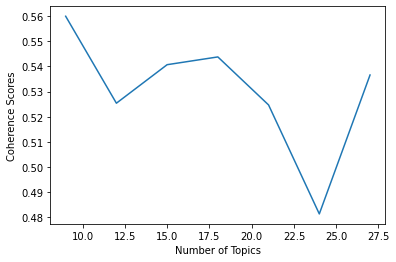

In [25]:
import matplotlib.pyplot as plt

plt.plot(topic_numbers, coherence_scores, "-"),
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Scores")

plt.show()

In [ ]:
# LDA Model
# num_topics parametresi, görselde en iyi çıkan tutarlılık skoruna göre belirlenebilir. 
# En yüksek tutarlılık sokurunu veren konu sayısı seçilebilir.

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=18,
                                            passes=10)

In [30]:
# Oluşturulan soyut konular içerisinde en fazla bulunan terimler
topics = lda_model.print_topics(num_words=7) 
topics = sorted(topics, key=lambda x: x[0])
 
for topic in topics:
    print(topic)

(0, '0.016*"parti" + 0.012*"belediye" + 0.012*"chp" + 0.011*"ak" + 0.011*"erdoğan" + 0.009*"başkanı" + 0.008*"ankara"')
(1, '0.006*"göre" + 0.005*"olarak" + 0.005*"başvuru" + 0.005*"tarafından" + 0.005*"olan" + 0.005*"ilişkin" + 0.004*"ilgili"')
(2, '0.040*"yüzde" + 0.023*"milyon" + 0.020*"bin" + 0.018*"milyar" + 0.013*"göre" + 0.009*"dolar" + 0.009*"türkiye"')
(3, '0.005*"a" + 0.005*"olduğu" + 0.005*"yıl" + 0.005*"olay" + 0.005*"polis" + 0.005*"ceza" + 0.004*"fetö"')
(4, '0.020*"i̇stanbul" + 0.007*"türk" + 0.006*"olan" + 0.006*"sanat" + 0.005*"kültür" + 0.005*"yer" + 0.005*"ilk"')
(5, '0.020*"i̇stanbul" + 0.014*"yıldırım" + 0.012*"bin" + 0.010*"soylu" + 0.006*"deprem" + 0.005*"kurum" + 0.005*"erdoğan"')
(6, '0.016*"var" + 0.009*"ben" + 0.008*"değil" + 0.007*"yok" + 0.005*"benim" + 0.005*"zaman" + 0.005*"böyle"')
(7, '0.011*"yer" + 0.006*"anadolu" + 0.006*"zaman" + 0.005*"kar" + 0.005*"olan" + 0.005*"huawei" + 0.005*"hava"')
(8, '0.020*"iframe" + 0.020*"son" + 0.018*"com" + 0.018*"www"

In [28]:
pyLDAvis.enable_notebook()
gorsel = gensimvis.prepare(lda_model, corpus, dictionary, mds='mmds')
pyLDAvis.display(gorsel)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
